In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import scipy as sp
import numpy as np
import anndata as ad
from anndata import AnnData
from scipy.sparse import csr_matrix

import scvi
from matplotlib.pyplot import rc_context
import matplotlib.pyplot as plt
import matplotlib

scvi.settings.seed = 0

/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/scVI/lib/python3.11/site-packages/scvi/_settings.py:63: UserWarning: Since v1.0.0, scvi-tools no longer uses a random seed by default. Run `scvi.settings.seed = 0` to reproduce results from previous versions.
  self.seed = seed
/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/scVI/lib/python3.11/site-packages/scvi/_settings.py:70: UserWarning: Setting `dl_pin_memory_gpu_training` is deprecated in v1.0 and will be removed in v1.1. Please pass in `pin_memory` to the data loaders instead.
  self.dl_pin_memory_gpu_training = (
Global seed set to 0


In [2]:
import os

# Main directory containing subdirectories
main_directory = '/scratch365/eaboelno/Macnair_biorxiv_MS/'

In [7]:
adata = sc.read_h5ad('./WM_data_updated_meta.h5ad')
adata

AnnData object with n_obs × n_vars = 335694 × 33939
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'sample_id_anon', 'individual_id_anon', 'cell_id', 'type_fine', 'type_broad', 'cluster_zoom', 'exclude_pseudobulk', 'cortical_layer', 'log10_counts', 'log10_feats', 'logit_mito', 'logit_splice', 'pct_mito', 'pct_splice', 'lesion_type', 'seq_pool', 'matter', 'sample_source', 'diagnosis', 'sex', 'age_at_death', 'smoker', 'cause_of_death', 'years_w_ms', 'pmi_minutes', 'age_scale', 'age_cat', 'pmi_cat', 'pmi_cat2', 'ident', 'Treatment', 'Sample_ID', 'Replicate', 'Publication', 'Time', 'Condition', 'Tissue', 'Batch', 'n_genes'
    var: 'gene_id', 'ensembl'
    uns: 'X_name', 'lesion_type_colors', 'sample_id_anon_colors'
    layers: 'counts', 'log1p_norm'

# Background work

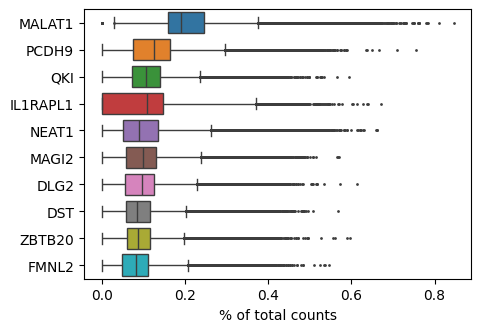

In [4]:
sc.pl.highest_expr_genes(adata, n_top=10, )

In [12]:
#adata.write_h5ad('/scratch365/eaboelno/Macnair_biorxiv_MS/adata_meta_Macnair.h5ad')

# Edit metadata information

In [ ]:
#AnnData object with n_obs × n_vars = 112213 × 10000
#    obs: 'Sample_ID', 'Publication', 'Treatment', 'Condition', 'Tissue', 'Time', 'Batch', 'background_fraction', 'cell_probability', 'cell_size', 'droplet_efficiency', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'doublet_score', 'n_counts', 'S_score', 'G2M_score', 'phase', 'leiden', 'cell_type', 'leiden_scVI', 'n_genes'
#    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std'
#    uns: 'Publication_colors', 'Batch_colors', 'hvg', 'pca', 'neighbors', 'paga', 'leiden_sizes', 'leiden_colors', 'umap', 'leiden', 'phase_colors'
#    obsm: 'X_pca', 'X_umap', 'gene_expression_encoding'
#    varm: 'PCs'
#    layers: 'counts', 'log1p_norm'
#    obsp: 'distances', 'connectivities'

In [ ]:
columns_to_drop = ['orig.ident', 'nCount_RNA', 'nFeature_RNA']
adata.obs.drop(columns=columns_to_drop, inplace=True)

In [11]:
# Add columns to the adata object
Sample_ID = 'Human_MS'
treatments = 'MS'
condition = 'MS'
rep = '1'
time = 'MS'
publication = 'Macnair et al. biorxiv'
tissue = 'White matter'
batch = '31'

adata.obs['Treatment'] = treatments
adata.obs['Sample_ID'] = Sample_ID
adata.obs['Replicate'] = rep 
adata.obs['Publication'] = publication
adata.obs['Time'] = time
adata.obs['Condition'] = condition
adata.obs['Tissue'] = tissue
adata.obs['Batch'] = batch

# Verify by checking the adata object for the added columns
print(adata)

AnnData object with n_obs × n_vars = 335694 × 33939
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'sample_id_anon', 'individual_id_anon', 'cell_id', 'type_fine', 'type_broad', 'cluster_zoom', 'exclude_pseudobulk', 'cortical_layer', 'log10_counts', 'log10_feats', 'logit_mito', 'logit_splice', 'pct_mito', 'pct_splice', 'lesion_type', 'seq_pool', 'matter', 'sample_source', 'diagnosis', 'sex', 'age_at_death', 'smoker', 'cause_of_death', 'years_w_ms', 'pmi_minutes', 'age_scale', 'age_cat', 'pmi_cat', 'pmi_cat2', 'ident', 'Treatment', 'Sample_ID', 'Replicate', 'Publication', 'Time', 'Condition', 'Tissue', 'Batch'
    var: 'gene_id', 'ensembl'
    uns: 'X_name'


# Add QC values to match mouse data

/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/scVI/lib/python3.11/site-packages/scanpy/plotting/_anndata.py:842: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


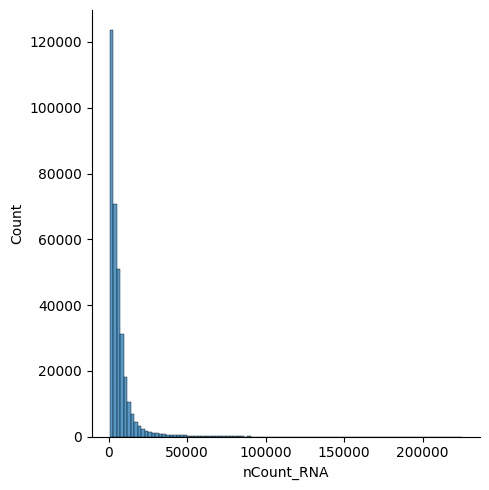

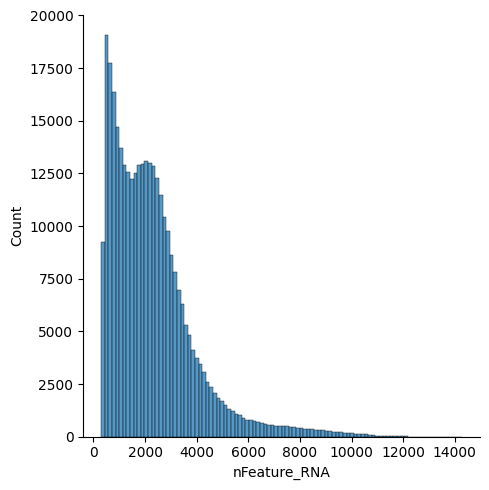

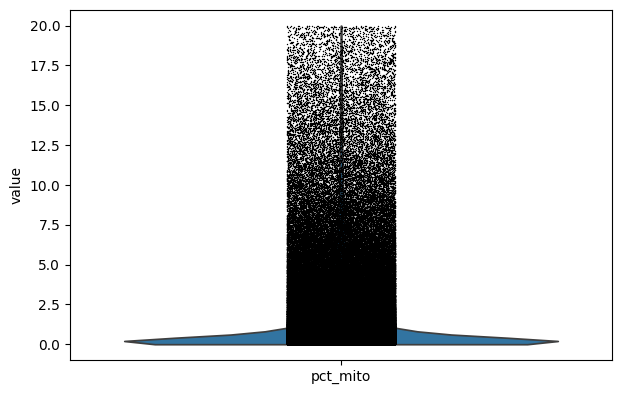

In [13]:
p1 = sns.displot(adata.obs["nCount_RNA"], bins=100, kde=False)
p1 = sns.displot(adata.obs["nFeature_RNA"], bins=100, kde=False)
# sc.pl.violin(adata, 'total_counts')
p2 = sc.pl.violin(adata, "pct_mito")

In [14]:
sc.pp.filter_cells(adata, min_genes=3)
adata

AnnData object with n_obs × n_vars = 335694 × 33939
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'sample_id_anon', 'individual_id_anon', 'cell_id', 'type_fine', 'type_broad', 'cluster_zoom', 'exclude_pseudobulk', 'cortical_layer', 'log10_counts', 'log10_feats', 'logit_mito', 'logit_splice', 'pct_mito', 'pct_splice', 'lesion_type', 'seq_pool', 'matter', 'sample_source', 'diagnosis', 'sex', 'age_at_death', 'smoker', 'cause_of_death', 'years_w_ms', 'pmi_minutes', 'age_scale', 'age_cat', 'pmi_cat', 'pmi_cat2', 'ident', 'Treatment', 'Sample_ID', 'Replicate', 'Publication', 'Time', 'Condition', 'Tissue', 'Batch', 'n_genes'
    var: 'gene_id', 'ensembl'
    uns: 'X_name'

In [15]:
adata.obs

,orig.ident,nCount_RNA,nFeature_RNA,sample_id_anon,individual_id_anon,cell_id,type_fine,type_broad,cluster_zoom,exclude_pseudobulk,...,ident,Treatment,Sample_ID,Replicate,Publication,Time,Condition,Tissue,Batch,n_genes
Ind98-Sample2:AAACCCATCCGTCAAA-1,SeuratProject,3012.0,1512,Ind98-Sample2,Ind98,Ind98-Sample2:AAACCCATCCGTCAAA-1,Oligo_B,Oligodendrocytes,oligo_opc-cl01,False,...,SeuratProject,MS,Human_MS,1,Macnair et al. biorxiv,MS,MS,White matter,31,1512
Ind98-Sample2:AAACCCATCCTGGTCT-1,SeuratProject,843.0,639,Ind98-Sample2,Ind98,Ind98-Sample2:AAACCCATCCTGGTCT-1,Micro_B,Microglia,microglia-cl02,False,...,SeuratProject,MS,Human_MS,1,Macnair et al. biorxiv,MS,MS,White matter,31,639
Ind98-Sample2:AAACGAAGTTGTACGT-1,SeuratProject,5475.0,2448,Ind98-Sample2,Ind98,Ind98-Sample2:AAACGAAGTTGTACGT-1,Oligo_A,Oligodendrocytes,oligo_opc-cl07,False,...,SeuratProject,MS,Human_MS,1,Macnair et al. biorxiv,MS,MS,White matter,31,2448
Ind98-Sample2:AAACGCTAGCGTATGG-1,SeuratProject,1346.0,1000,Ind98-Sample2,Ind98,Ind98-Sample2:AAACGCTAGCGTATGG-1,Astro_B,Astrocytes,astrocytes-cl03,False,...,SeuratProject,MS,Human_MS,1,Macnair et al. biorxiv,MS,MS,White matter,31,1000
Ind98-Sample2:AAACGCTCAGTTGGTT-1,SeuratProject,562.0,420,Ind98-Sample2,Ind98,Ind98-Sample2:AAACGCTCAGTTGGTT-1,Oligo_E,Oligodendrocytes,oligo_opc-cl03,False,...,SeuratProject,MS,Human_MS,1,Macnair et al. biorxiv,MS,MS,White matter,31,420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ind102-Sample4:TTTGTTGAGTAGCTCT-1,SeuratProject,1060.0,641,Ind102-Sample4,Ind102,Ind102-Sample4:TTTGTTGAGTAGCTCT-1,Micro_C,Microglia,microglia-cl03,False,...,SeuratProject,MS,Human_MS,1,Macnair et al. biorxiv,MS,MS,White matter,31,641
Ind102-Sample4:TTTGTTGCAGACGATG-1,SeuratProject,820.0,580,Ind102-Sample4,Ind102,Ind102-Sample4:TTTGTTGCAGACGATG-1,Micro_B,Microglia,microglia-cl02,False,...,SeuratProject,MS,Human_MS,1,Macnair et al. biorxiv,MS,MS,White matter,31,580
Ind102-Sample4:TTTGTTGCATACAGAA-1,SeuratProject,1899.0,1146,Ind102-Sample4,Ind102,Ind102-Sample4:TTTGTTGCATACAGAA-1,Oligo_E,Oligodendrocytes,oligo_opc-cl03,False,...,SeuratProject,MS,Human_MS,1,Macnair et al. biorxiv,MS,MS,White matter,31,1146
Ind102-Sample4:TTTGTTGCATGCTGCG-1,SeuratProject,4563.0,2132,Ind102-Sample4,Ind102,Ind102-Sample4:TTTGTTGCATGCTGCG-1,Oligo_D,Oligodendrocytes,oligo_opc-cl04,False,...,SeuratProject,MS,Human_MS,1,Macnair et al. biorxiv,MS,MS,White matter,31,2132


In [21]:
# Assuming 'sample_id_anon' is the column you want to check
unique_values_count = adata.obs['sample_id_anon'].nunique()

# Print the number of unique values
print(f"Number of unique values in 'sample_id_anon': {unique_values_count}")

Number of unique values in 'sample_id_anon': 92


In [22]:
# Assuming 'sample_id_anon' is the column you want to check
unique_values_count = adata.obs['individual_id_anon'].nunique()

# Print the number of unique values
print(f"Number of unique values in 'individual_id_anon': {unique_values_count}")

Number of unique values in 'individual_id_anon': 47


/tmp/41673.1.gpu/ipykernel_2983091/1550908505.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_table = adata.obs[['sample_id_anon', 'individual_id_anon']].drop_duplicates().groupby('individual_id_anon').size().reset_index(name='Number_of_Samples')


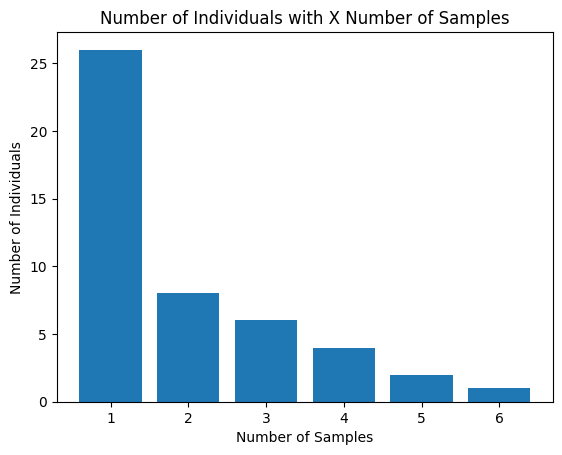

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'sample_id_anon' and 'individual_id_anon' are the columns you want to use
summary_table = adata.obs[['sample_id_anon', 'individual_id_anon']].drop_duplicates().groupby('individual_id_anon').size().reset_index(name='Number_of_Samples')

# Plotting
plt.bar(summary_table['Number_of_Samples'].value_counts().index, summary_table['Number_of_Samples'].value_counts())
plt.xlabel('Number of Samples')
plt.ylabel('Number of Individuals')
plt.title('Number of Individuals with X Number of Samples')
plt.show()

In [20]:
# Annotate the data sets
print(adata.obs['lesion_type'].value_counts())
print('')
print(adata.obs['diagnosis'].value_counts())
print('')
print(adata.obs['age_cat'].value_counts())

lesion_type
AL      76268
CAL     60958
NAWM    60059
WM      54721
RL      43866
CIL     39822
Name: count, dtype: int64

diagnosis
SPMS    183444
PPMS     89910
CTR      54721
RRMS      7619
Name: count, dtype: int64

age_cat
under_50     170010
over_70      103360
inbetween     62324
Name: count, dtype: int64


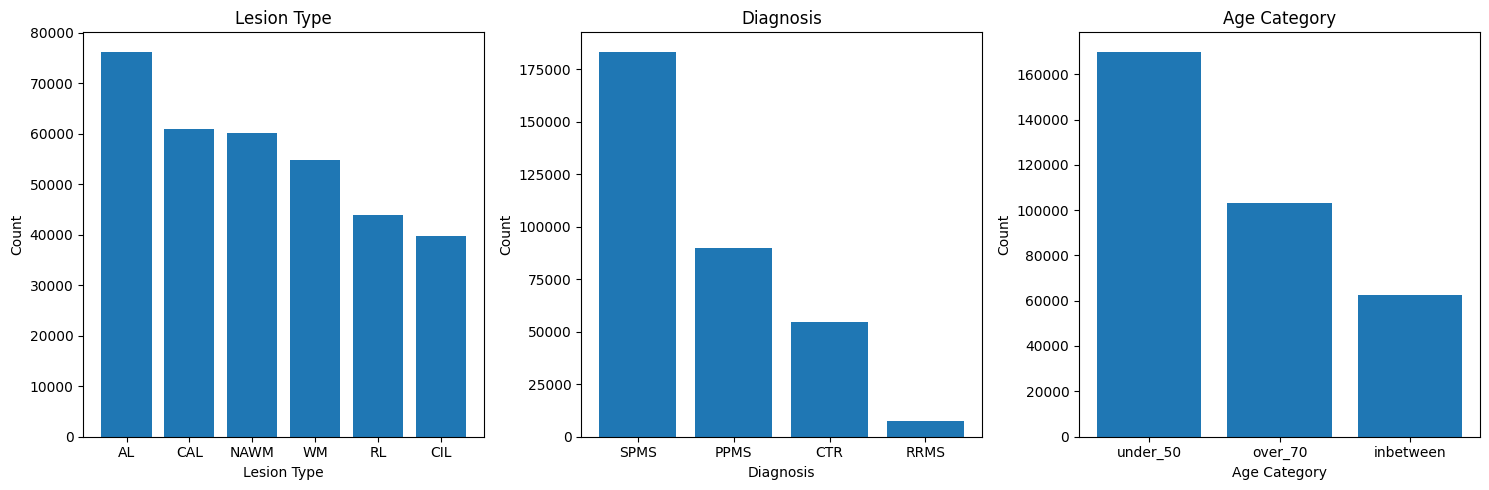

In [25]:
# Create subplots for each summary plot
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot for 'lesion_type'
axes[0].bar(adata.obs['lesion_type'].value_counts().index, adata.obs['lesion_type'].value_counts())
axes[0].set_title('Lesion Type')
axes[0].set_xlabel('Lesion Type')
axes[0].set_ylabel('Count')

# Plot for 'diagnosis'
axes[1].bar(adata.obs['diagnosis'].value_counts().index, adata.obs['diagnosis'].value_counts())
axes[1].set_title('Diagnosis')
axes[1].set_xlabel('Diagnosis')
axes[1].set_ylabel('Count')

# Plot for 'age_cat'
axes[2].bar(adata.obs['age_cat'].value_counts().index, adata.obs['age_cat'].value_counts())
axes[2].set_title('Age Category')
axes[2].set_xlabel('Age Category')
axes[2].set_ylabel('Count')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

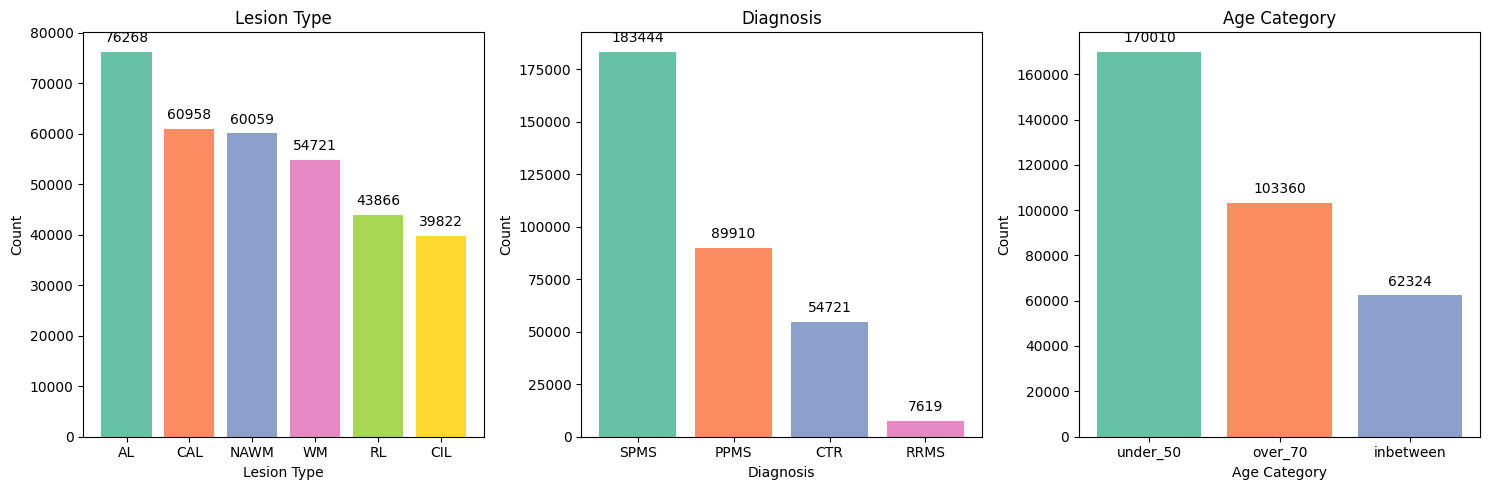

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots for each summary plot
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Function to annotate bars with counts and assign colors
def annotate_bars(ax, counts, colors):
    for p, count, color in zip(ax.patches, counts, colors):
        ax.annotate(f'{count}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
        p.set_facecolor(color)

# Plot for 'lesion_type'
lesion_type_counts = adata.obs['lesion_type'].value_counts()
lesion_type_colors = sns.color_palette('Set2', len(lesion_type_counts))
axes[0].bar(lesion_type_counts.index, lesion_type_counts, color=lesion_type_colors)
axes[0].set_title('Lesion Type')
axes[0].set_xlabel('Lesion Type')
axes[0].set_ylabel('Count')
annotate_bars(axes[0], lesion_type_counts, lesion_type_colors)

# Plot for 'diagnosis'
diagnosis_counts = adata.obs['diagnosis'].value_counts()
diagnosis_colors = sns.color_palette('Set2', len(diagnosis_counts))
axes[1].bar(diagnosis_counts.index, diagnosis_counts, color=diagnosis_colors)
axes[1].set_title('Diagnosis')
axes[1].set_xlabel('Diagnosis')
axes[1].set_ylabel('Count')
annotate_bars(axes[1], diagnosis_counts, diagnosis_colors)

# Plot for 'age_cat'
age_cat_counts = adata.obs['age_cat'].value_counts()
age_cat_colors = sns.color_palette('Set2', len(age_cat_counts))
axes[2].bar(age_cat_counts.index, age_cat_counts, color=age_cat_colors)
axes[2].set_title('Age Category')
axes[2].set_xlabel('Age Category')
axes[2].set_ylabel('Count')
annotate_bars(axes[2], age_cat_counts, age_cat_colors)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


/tmp/41673.1.gpu/ipykernel_2983091/1872093303.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plot_df = adata.obs.groupby(['lesion_type', 'age_cat']).size().unstack(fill_value=0)


<Figure size 1000x600 with 0 Axes>

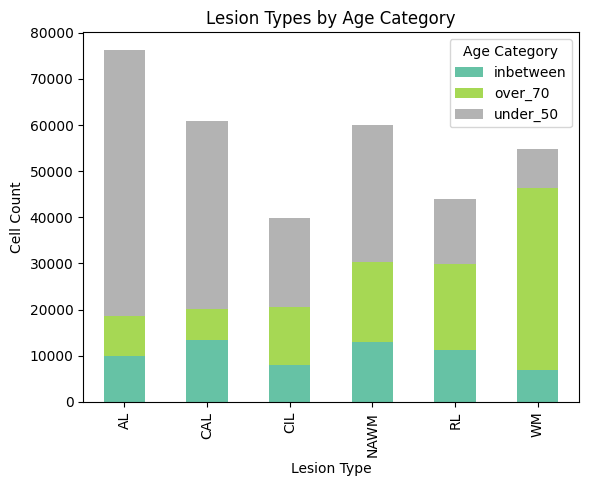

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame for plotting
plot_df = adata.obs.groupby(['lesion_type', 'age_cat']).size().unstack(fill_value=0)

# Plotting a stacked bar chart
plt.figure(figsize=(10, 6))
plot_df.plot(kind='bar', stacked=True, colormap='Set2')

# Customize the plot
plt.title('Lesion Types by Age Category')
plt.xlabel('Lesion Type')
plt.ylabel('Cell Count')
plt.legend(title='Age Category', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()


/tmp/41673.1.gpu/ipykernel_2983091/4249385199.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plot_df = adata.obs.groupby(['lesion_type', 'diagnosis']).size().unstack(fill_value=0)


<Figure size 1000x600 with 0 Axes>

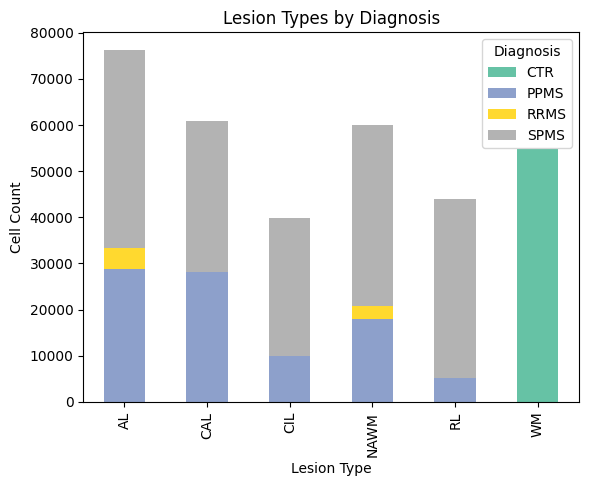

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame for plotting
plot_df = adata.obs.groupby(['lesion_type', 'diagnosis']).size().unstack(fill_value=0)

# Plotting a stacked bar chart
plt.figure(figsize=(10, 6))
plot_df.plot(kind='bar', stacked=True, colormap='Set2')

# Customize the plot
plt.title('Lesion Types by Diagnosis')
plt.xlabel('Lesion Type')
plt.ylabel('Cell Count')
plt.legend(title='Diagnosis', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()


In [34]:
adata

AnnData object with n_obs × n_vars = 335694 × 33939
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'sample_id_anon', 'individual_id_anon', 'cell_id', 'type_fine', 'type_broad', 'cluster_zoom', 'exclude_pseudobulk', 'cortical_layer', 'log10_counts', 'log10_feats', 'logit_mito', 'logit_splice', 'pct_mito', 'pct_splice', 'lesion_type', 'seq_pool', 'matter', 'sample_source', 'diagnosis', 'sex', 'age_at_death', 'smoker', 'cause_of_death', 'years_w_ms', 'pmi_minutes', 'age_scale', 'age_cat', 'pmi_cat', 'pmi_cat2', 'ident', 'Treatment', 'Sample_ID', 'Replicate', 'Publication', 'Time', 'Condition', 'Tissue', 'Batch', 'n_genes'
    var: 'gene_id', 'ensembl'
    uns: 'X_name'

/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/scVI/lib/python3.11/site-packages/scanpy/plotting/_anndata.py:770: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(adata.obs[groupby]):
/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/scVI/lib/python3.11/site-packages/scanpy/plotting/_anndata.py:842: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(
/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/scVI/lib/python3.11/site-packages/scanpy/plotting/_anndata.py:842: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


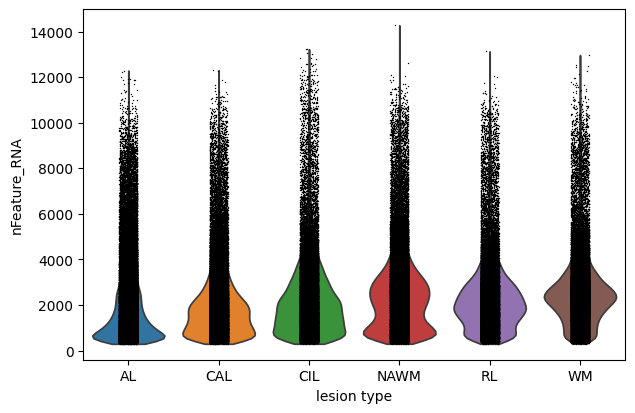

In [36]:
sc.pl.violin(adata, 'nFeature_RNA', groupby='lesion_type')

/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/scVI/lib/python3.11/site-packages/scanpy/plotting/_anndata.py:770: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(adata.obs[groupby]):
/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/scVI/lib/python3.11/site-packages/scanpy/plotting/_anndata.py:842: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(
/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/scVI/lib/python3.11/site-packages/scanpy/plotting/_anndata.py:842: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


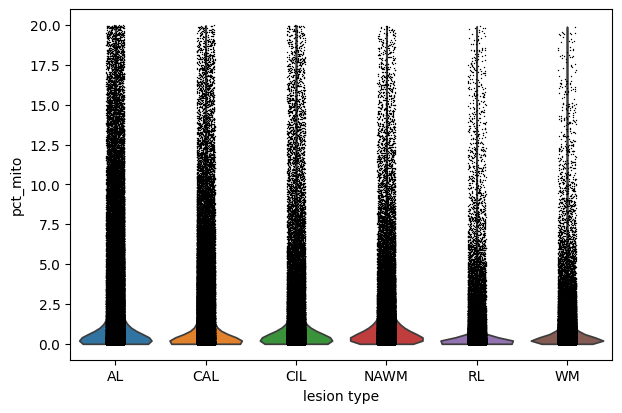

In [38]:
sc.pl.violin(adata, 'pct_mito', groupby='lesion_type')

/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/scVI/lib/python3.11/site-packages/scanpy/plotting/_anndata.py:770: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(adata.obs[groupby]):
/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/scVI/lib/python3.11/site-packages/scanpy/plotting/_anndata.py:842: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(
/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/scVI/lib/python3.11/site-packages/scanpy/plotting/_anndata.py:842: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


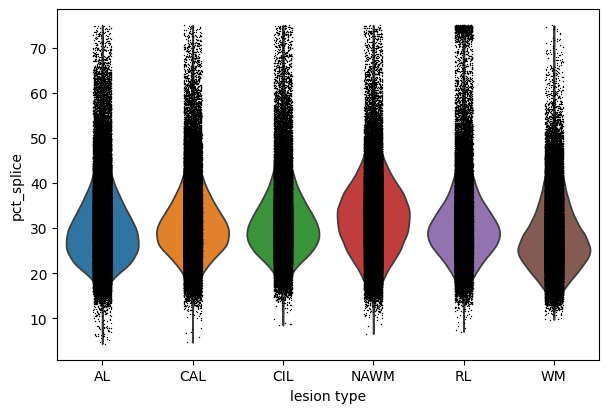

In [47]:
sc.pl.violin(adata, 'pct_splice', groupby='lesion_type')

# Normalize counts

In [39]:
adata

AnnData object with n_obs × n_vars = 335694 × 33939
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'sample_id_anon', 'individual_id_anon', 'cell_id', 'type_fine', 'type_broad', 'cluster_zoom', 'exclude_pseudobulk', 'cortical_layer', 'log10_counts', 'log10_feats', 'logit_mito', 'logit_splice', 'pct_mito', 'pct_splice', 'lesion_type', 'seq_pool', 'matter', 'sample_source', 'diagnosis', 'sex', 'age_at_death', 'smoker', 'cause_of_death', 'years_w_ms', 'pmi_minutes', 'age_scale', 'age_cat', 'pmi_cat', 'pmi_cat2', 'ident', 'Treatment', 'Sample_ID', 'Replicate', 'Publication', 'Time', 'Condition', 'Tissue', 'Batch', 'n_genes'
    var: 'gene_id', 'ensembl'
    uns: 'X_name', 'sample_id_anon_colors', 'lesion_type_colors'

In [40]:
adata.layers['counts'] = adata.X.copy()
adata

AnnData object with n_obs × n_vars = 335694 × 33939
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'sample_id_anon', 'individual_id_anon', 'cell_id', 'type_fine', 'type_broad', 'cluster_zoom', 'exclude_pseudobulk', 'cortical_layer', 'log10_counts', 'log10_feats', 'logit_mito', 'logit_splice', 'pct_mito', 'pct_splice', 'lesion_type', 'seq_pool', 'matter', 'sample_source', 'diagnosis', 'sex', 'age_at_death', 'smoker', 'cause_of_death', 'years_w_ms', 'pmi_minutes', 'age_scale', 'age_cat', 'pmi_cat', 'pmi_cat2', 'ident', 'Treatment', 'Sample_ID', 'Replicate', 'Publication', 'Time', 'Condition', 'Tissue', 'Batch', 'n_genes'
    var: 'gene_id', 'ensembl'
    uns: 'X_name', 'sample_id_anon_colors', 'lesion_type_colors'
    layers: 'counts'

In [41]:
# Normalize total counts to a target sum of 1e4
sc.pp.normalize_total(adata, target_sum=1e4)
    
# Logarithmize the data and assign to the X slot
adata.layers["log1p_norm"] = sc.pp.log1p(adata.X)
    
# Assign the raw attribute
adata.raw = adata

adata

AnnData object with n_obs × n_vars = 335694 × 33939
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'sample_id_anon', 'individual_id_anon', 'cell_id', 'type_fine', 'type_broad', 'cluster_zoom', 'exclude_pseudobulk', 'cortical_layer', 'log10_counts', 'log10_feats', 'logit_mito', 'logit_splice', 'pct_mito', 'pct_splice', 'lesion_type', 'seq_pool', 'matter', 'sample_source', 'diagnosis', 'sex', 'age_at_death', 'smoker', 'cause_of_death', 'years_w_ms', 'pmi_minutes', 'age_scale', 'age_cat', 'pmi_cat', 'pmi_cat2', 'ident', 'Treatment', 'Sample_ID', 'Replicate', 'Publication', 'Time', 'Condition', 'Tissue', 'Batch', 'n_genes'
    var: 'gene_id', 'ensembl'
    uns: 'X_name', 'sample_id_anon_colors', 'lesion_type_colors'
    layers: 'counts', 'log1p_norm'

In [51]:
# Assuming adata_scvi.X is a NumPy array
subset_matrix = adata.X[:20, :20]

# Print the subset matrix
print(subset_matrix)

  (2, 12)	1.537505303406224
  (7, 12)	1.2002639505735508
  (8, 12)	0.17572333242300575
  (3, 19)	2.1317280276818393


In [42]:
adata.write_h5ad('./norm_adata_WM.h5ad')

# Scanpy calculating

In [11]:
adata

AnnData object with n_obs × n_vars = 335694 × 33939
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'sample_id_anon', 'individual_id_anon', 'cell_id', 'type_fine', 'type_broad', 'cluster_zoom', 'exclude_pseudobulk', 'cortical_layer', 'log10_counts', 'log10_feats', 'logit_mito', 'logit_splice', 'pct_mito', 'pct_splice', 'lesion_type', 'seq_pool', 'matter', 'sample_source', 'diagnosis', 'sex', 'age_at_death', 'smoker', 'cause_of_death', 'years_w_ms', 'pmi_minutes', 'age_scale', 'age_cat', 'pmi_cat', 'pmi_cat2', 'ident', 'Treatment', 'Sample_ID', 'Replicate', 'Publication', 'Time', 'Condition', 'Tissue', 'Batch', 'n_genes'
    var: 'gene_id', 'ensembl', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'X_name', 'lesion_type_colors', 'sample_id_anon_colors', 'hvg'
    layers: 'counts', 'log1p_norm'

In [12]:
adata_scvi

AnnData object with n_obs × n_vars = 335694 × 4000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'sample_id_anon', 'individual_id_anon', 'cell_id', 'type_fine', 'type_broad', 'cluster_zoom', 'exclude_pseudobulk', 'cortical_layer', 'log10_counts', 'log10_feats', 'logit_mito', 'logit_splice', 'pct_mito', 'pct_splice', 'lesion_type', 'seq_pool', 'matter', 'sample_source', 'diagnosis', 'sex', 'age_at_death', 'smoker', 'cause_of_death', 'years_w_ms', 'pmi_minutes', 'age_scale', 'age_cat', 'pmi_cat', 'pmi_cat2', 'ident', 'Treatment', 'Sample_ID', 'Replicate', 'Publication', 'Time', 'Condition', 'Tissue', 'Batch', 'n_genes', '_scvi_batch', '_scvi_labels'
    var: 'gene_id', 'ensembl', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'X_name', 'lesion_type_colors', 'sample_id_anon_colors', 'hvg', '_scvi_uuid', '_scvi_manager_uuid'
    layers: 'counts', 'log1p_norm'

In [13]:
adata_scvi.write('/scratch365/eaboelno/Macnair_biorxiv_MS/adata_WM_4Khvg.h5ad')

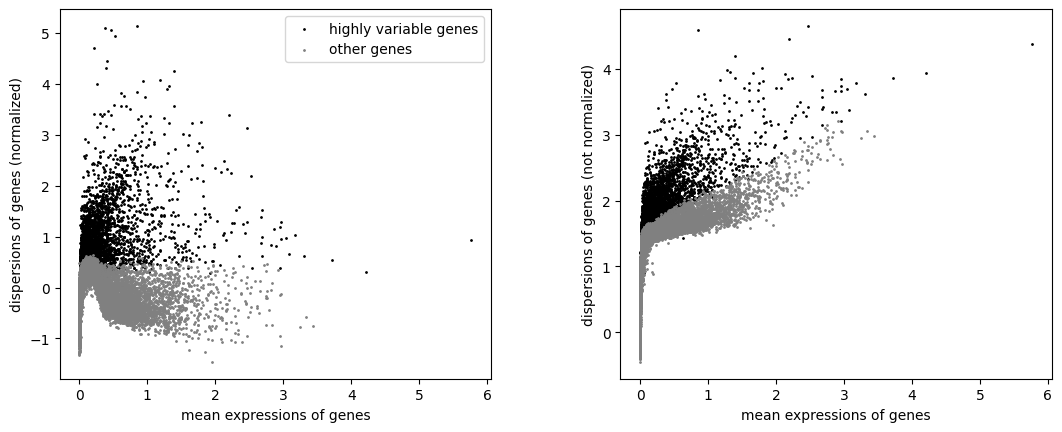

In [15]:
sc.pl.highly_variable_genes(adata)

In [23]:
adata.obs

,orig.ident,nCount_RNA,nFeature_RNA,sample_id_anon,individual_id_anon,cell_id,type_fine,type_broad,cluster_zoom,exclude_pseudobulk,...,Replicate,Publication,Time,Condition,Tissue,Batch,n_genes,S_score,G2M_score,phase
Ind98-Sample2:AAACCCATCCGTCAAA-1,SeuratProject,3012.0,1512,Ind98-Sample2,Ind98,Ind98-Sample2:AAACCCATCCGTCAAA-1,Oligo_B,Oligodendrocytes,oligo_opc-cl01,False,...,1,Macnair et al. biorxiv,MS,MS,White matter,31,1512,-0.038595,-0.061295,G1
Ind98-Sample2:AAACCCATCCTGGTCT-1,SeuratProject,843.0,639,Ind98-Sample2,Ind98,Ind98-Sample2:AAACCCATCCTGGTCT-1,Micro_B,Microglia,microglia-cl02,False,...,1,Macnair et al. biorxiv,MS,MS,White matter,31,639,-0.077440,0.031892,G2M
Ind98-Sample2:AAACGAAGTTGTACGT-1,SeuratProject,5475.0,2448,Ind98-Sample2,Ind98,Ind98-Sample2:AAACGAAGTTGTACGT-1,Oligo_A,Oligodendrocytes,oligo_opc-cl07,False,...,1,Macnair et al. biorxiv,MS,MS,White matter,31,2448,-0.081434,-0.049244,G1
Ind98-Sample2:AAACGCTAGCGTATGG-1,SeuratProject,1346.0,1000,Ind98-Sample2,Ind98,Ind98-Sample2:AAACGCTAGCGTATGG-1,Astro_B,Astrocytes,astrocytes-cl03,False,...,1,Macnair et al. biorxiv,MS,MS,White matter,31,1000,-0.088210,-0.084726,G1
Ind98-Sample2:AAACGCTCAGTTGGTT-1,SeuratProject,562.0,420,Ind98-Sample2,Ind98,Ind98-Sample2:AAACGCTCAGTTGGTT-1,Oligo_E,Oligodendrocytes,oligo_opc-cl03,False,...,1,Macnair et al. biorxiv,MS,MS,White matter,31,420,0.034034,0.037705,G2M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ind102-Sample4:TTTGTTGAGTAGCTCT-1,SeuratProject,1060.0,641,Ind102-Sample4,Ind102,Ind102-Sample4:TTTGTTGAGTAGCTCT-1,Micro_C,Microglia,microglia-cl03,False,...,1,Macnair et al. biorxiv,MS,MS,White matter,31,641,-0.048246,-0.086150,G1
Ind102-Sample4:TTTGTTGCAGACGATG-1,SeuratProject,820.0,580,Ind102-Sample4,Ind102,Ind102-Sample4:TTTGTTGCAGACGATG-1,Micro_B,Microglia,microglia-cl02,False,...,1,Macnair et al. biorxiv,MS,MS,White matter,31,580,-0.084481,-0.032177,G1
Ind102-Sample4:TTTGTTGCATACAGAA-1,SeuratProject,1899.0,1146,Ind102-Sample4,Ind102,Ind102-Sample4:TTTGTTGCATACAGAA-1,Oligo_E,Oligodendrocytes,oligo_opc-cl03,False,...,1,Macnair et al. biorxiv,MS,MS,White matter,31,1146,0.025758,0.049047,G2M
Ind102-Sample4:TTTGTTGCATGCTGCG-1,SeuratProject,4563.0,2132,Ind102-Sample4,Ind102,Ind102-Sample4:TTTGTTGCATGCTGCG-1,Oligo_D,Oligodendrocytes,oligo_opc-cl04,False,...,1,Macnair et al. biorxiv,MS,MS,White matter,31,2132,-0.049088,-0.058763,G1


In [24]:
sc.tl.pca(adata_scvi)
sc.pp.neighbors(adata_scvi)
sc.tl.umap(adata_scvi)

/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/scVI/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/scVI/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/scVI/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/afs/crc.nd.edu/user/e/eaboelno/miniforge3/

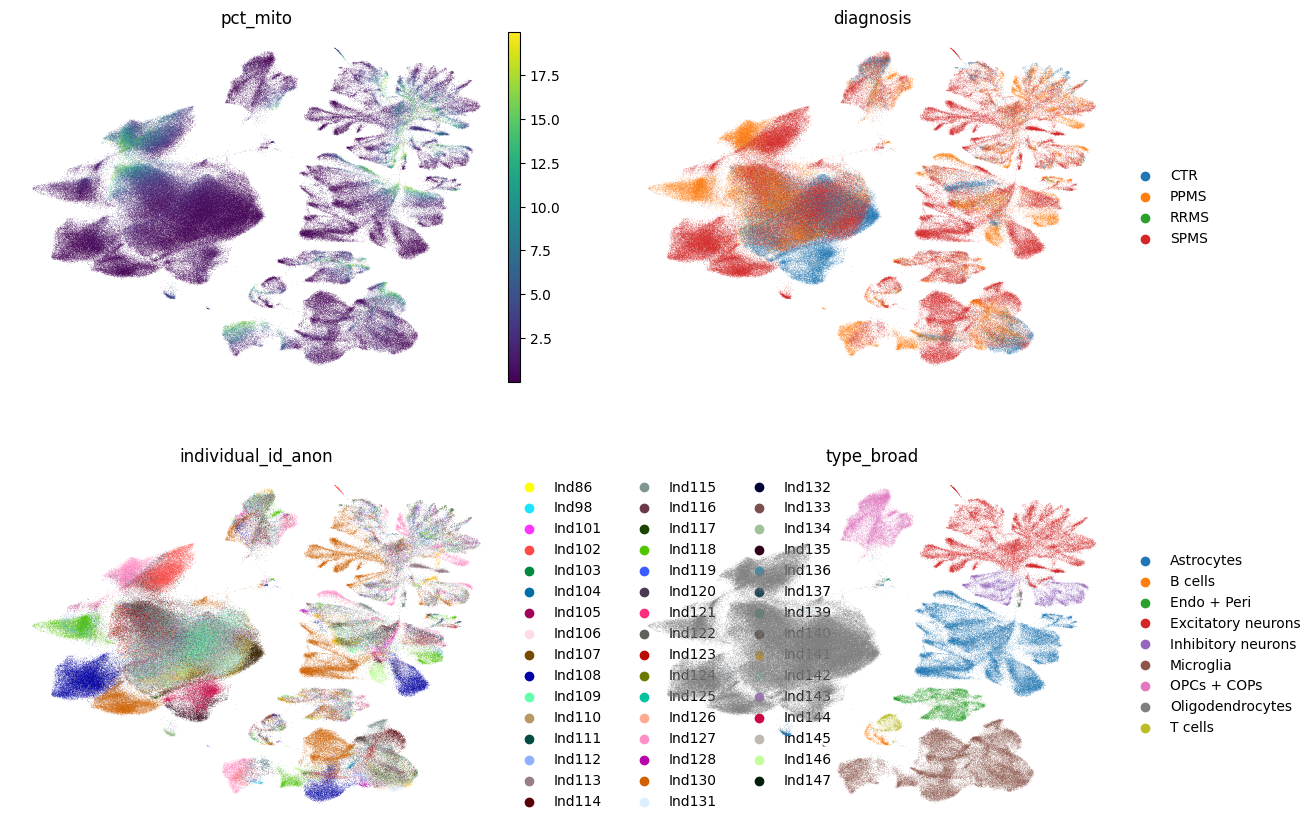

In [25]:
sc.pl.umap(adata_scvi, color = ['pct_mito', 'diagnosis', 'individual_id_anon', 'type_broad'], ncols=2, frameon = False)

In [26]:
adata_scvi

AnnData object with n_obs × n_vars = 335694 × 4000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'sample_id_anon', 'individual_id_anon', 'cell_id', 'type_fine', 'type_broad', 'cluster_zoom', 'exclude_pseudobulk', 'cortical_layer', 'log10_counts', 'log10_feats', 'logit_mito', 'logit_splice', 'pct_mito', 'pct_splice', 'lesion_type', 'seq_pool', 'matter', 'sample_source', 'diagnosis', 'sex', 'age_at_death', 'smoker', 'cause_of_death', 'years_w_ms', 'pmi_minutes', 'age_scale', 'age_cat', 'pmi_cat', 'pmi_cat2', 'ident', 'Treatment', 'Sample_ID', 'Replicate', 'Publication', 'Time', 'Condition', 'Tissue', 'Batch', 'n_genes', '_scvi_batch', '_scvi_labels'
    var: 'gene_id', 'ensembl', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'X_name', 'lesion_type_colors', 'sample_id_anon_colors', 'hvg', '_scvi_uuid', '_scvi_manager_uuid', 'pca', 'neighbors', 'umap', 'diagnosis_colors', 'individual_id_anon_colors'

# Prepare data for modeling

In [20]:
cell_cycle_genes = [x.strip() for x in open('/scratch365/eaboelno/regev_lab_cell_cycle_genes.txt')]
len(cell_cycle_genes)

97

In [21]:
s_genes = cell_cycle_genes[:43]
g2m_genes = cell_cycle_genes[43:]

print("Length of s_genes:", len(s_genes))
print("Length of g2m_genes:", len(g2m_genes))

Length of s_genes: 43
Length of g2m_genes: 54


In [22]:
sc.tl.score_genes_cell_cycle(adata, s_genes=s_genes, g2m_genes=g2m_genes)

In [23]:
# Assuming 'phase' is the column you want to summarize
# and 'Batch' is the grouping variable
cc_summary = adata.obs.groupby('sample_id_anon')['phase'].value_counts().unstack()

# Calculate the percentage of the total for each 'phase'
cc_summary_percentage = cc_summary.div(cc_summary.sum(axis=1), axis=0) * 100

# Concatenate the two DataFrames along the columns
merged_cc_summary = pd.concat([cc_summary, cc_summary_percentage], axis=1, keys=['Counts', 'Percentage'])

# Print the merged summary table
print(merged_cc_summary)

               Counts             Percentage                      
phase              G1   G2M     S         G1        G2M          S
sample_id_anon                                                    
Ind86-Sample2     792   144   231  67.866324  12.339332  19.794344
Ind98-Sample2    1194   212   215  73.658236  13.078347  13.263418
Ind101-Sample1    453   213   151  55.446756  26.070991  18.482252
Ind101-Sample2    678   256   165  61.692448  23.293904  15.013649
Ind101-Sample3   1221   691   413  52.516129  29.720430  17.763441
...               ...   ...   ...        ...        ...        ...
Ind143-Sample1   2043   450   685  64.285714  14.159849  21.554437
Ind144-Sample1   5149  1860  1317  61.842421  22.339659  15.817920
Ind145-Sample1   4698  1339  1229  64.657308  18.428296  16.914396
Ind146-Sample1   3695   862   526  72.693291  16.958489  10.348220
Ind147-Sample1    310   146   128  53.082192  25.000000  21.917808

[92 rows x 6 columns]


/tmp/47366.1.gpu/ipykernel_3711212/4135931085.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cc_summary = adata.obs.groupby('sample_id_anon')['phase'].value_counts().unstack()


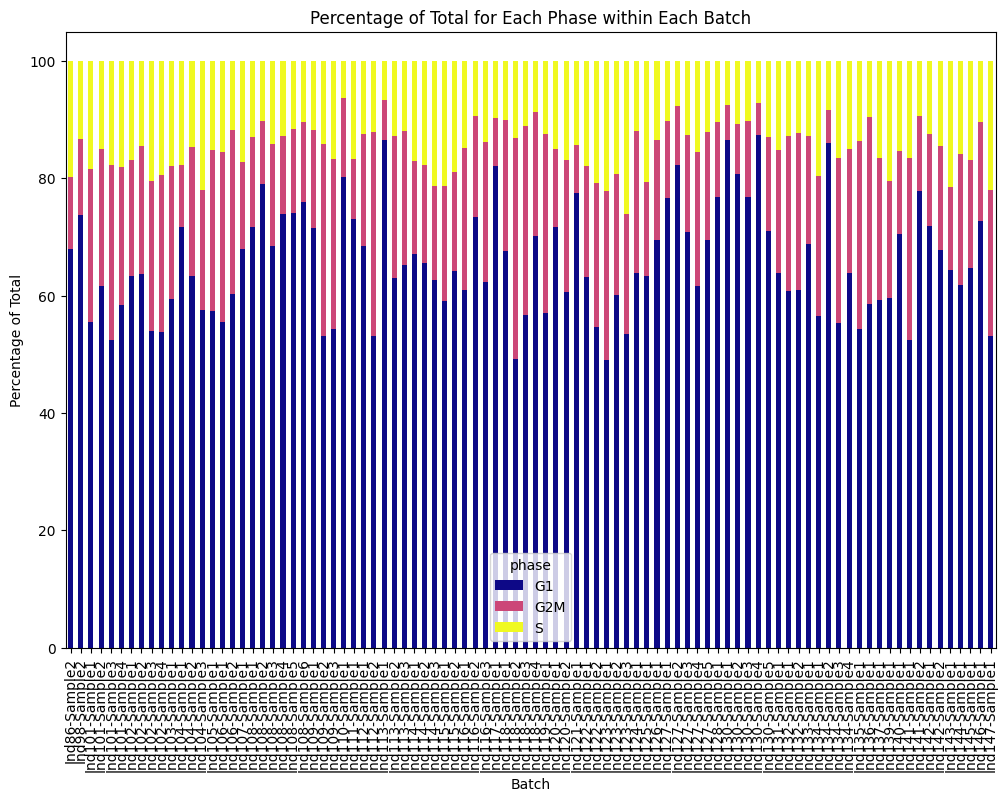

In [24]:
# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

# Bar chart for percentages
cc_summary_percentage.plot(kind='bar', stacked=True, ax=ax, colormap='plasma')

# Customize the plot
ax.set_ylabel('Percentage of Total')
ax.set_xlabel('Batch')
plt.title('Percentage of Total for Each Phase within Each Batch')

# Show the plot
plt.show()

In [27]:
adata.write_h5ad('/scratch365/eaboelno/Macnair_biorxiv_MS/WM_data_updated_meta.h5ad')

In [28]:
adata

AnnData object with n_obs × n_vars = 335694 × 33939
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'sample_id_anon', 'individual_id_anon', 'cell_id', 'type_fine', 'type_broad', 'cluster_zoom', 'exclude_pseudobulk', 'cortical_layer', 'log10_counts', 'log10_feats', 'logit_mito', 'logit_splice', 'pct_mito', 'pct_splice', 'lesion_type', 'seq_pool', 'matter', 'sample_source', 'diagnosis', 'sex', 'age_at_death', 'smoker', 'cause_of_death', 'years_w_ms', 'pmi_minutes', 'age_scale', 'age_cat', 'pmi_cat', 'pmi_cat2', 'ident', 'Treatment', 'Sample_ID', 'Replicate', 'Publication', 'Time', 'Condition', 'Tissue', 'Batch', 'n_genes', 'S_score', 'G2M_score', 'phase'
    var: 'gene_id', 'ensembl', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'X_name', 'lesion_type_colors', 'sample_id_anon_colors', 'hvg'
    layers: 'counts', 'log1p_norm'

In [29]:
sc.pp.highly_variable_genes(adata, batch_key="sample_id_anon")
adata

/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/scVI/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:215: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']
/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/scVI/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:215: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']
/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/scVI/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:215: FutureWarning: T

/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/scVI/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:215: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']
/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/scVI/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:215: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']
/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/scVI/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:215: FutureWarning: T

/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/scVI/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:215: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']
/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/scVI/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:215: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']
/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/scVI/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:215: FutureWarning: T

/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/scVI/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:215: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']
/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/scVI/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:215: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']
/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/scVI/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:215: FutureWarning: T

/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/scVI/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:215: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']
/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/scVI/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:215: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']
/afs/crc.nd.edu/user/e/eaboelno/miniforge3/envs/scVI/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:215: FutureWarning: T

AnnData object with n_obs × n_vars = 335694 × 33939
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'sample_id_anon', 'individual_id_anon', 'cell_id', 'type_fine', 'type_broad', 'cluster_zoom', 'exclude_pseudobulk', 'cortical_layer', 'log10_counts', 'log10_feats', 'logit_mito', 'logit_splice', 'pct_mito', 'pct_splice', 'lesion_type', 'seq_pool', 'matter', 'sample_source', 'diagnosis', 'sex', 'age_at_death', 'smoker', 'cause_of_death', 'years_w_ms', 'pmi_minutes', 'age_scale', 'age_cat', 'pmi_cat', 'pmi_cat2', 'ident', 'Treatment', 'Sample_ID', 'Replicate', 'Publication', 'Time', 'Condition', 'Tissue', 'Batch', 'n_genes', 'S_score', 'G2M_score', 'phase'
    var: 'gene_id', 'ensembl', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'X_name', 'lesion_type_colors', 'sample_id_anon_colors', 'hvg'
    layers: 'counts', 'log1p_norm'

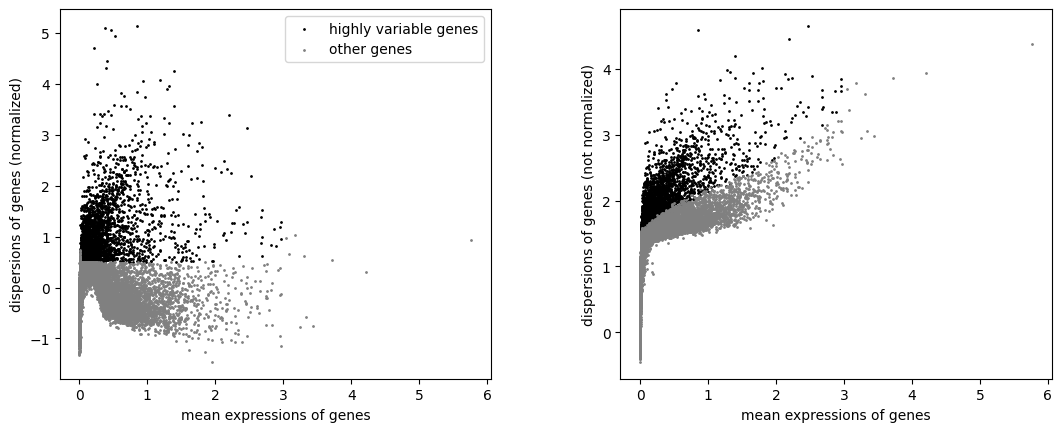

In [30]:
sc.pl.highly_variable_genes(adata)

highly_variable_nbatches
0     9891
1     2469
2     1508
3     1073
4      810
      ... 
85      33
90      32
88      30
91      29
92      27
Name: count, Length: 93, dtype: int64

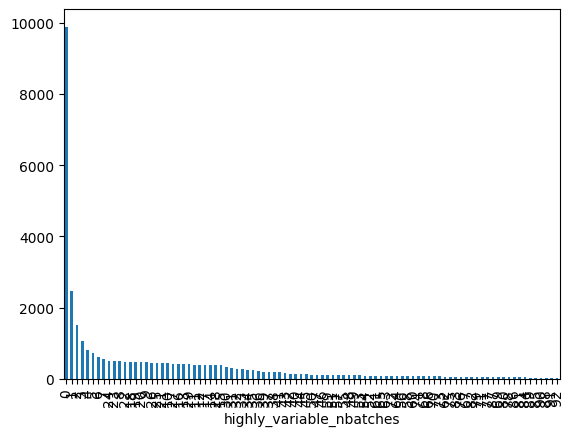

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
n_batches = adata.var["highly_variable_nbatches"].value_counts()
ax = n_batches.plot(kind="bar")
n_batches

In [32]:
adata_scvi = adata[:, adata.var["highly_variable"]].copy()
adata_scvi

AnnData object with n_obs × n_vars = 335694 × 3317
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'sample_id_anon', 'individual_id_anon', 'cell_id', 'type_fine', 'type_broad', 'cluster_zoom', 'exclude_pseudobulk', 'cortical_layer', 'log10_counts', 'log10_feats', 'logit_mito', 'logit_splice', 'pct_mito', 'pct_splice', 'lesion_type', 'seq_pool', 'matter', 'sample_source', 'diagnosis', 'sex', 'age_at_death', 'smoker', 'cause_of_death', 'years_w_ms', 'pmi_minutes', 'age_scale', 'age_cat', 'pmi_cat', 'pmi_cat2', 'ident', 'Treatment', 'Sample_ID', 'Replicate', 'Publication', 'Time', 'Condition', 'Tissue', 'Batch', 'n_genes', 'S_score', 'G2M_score', 'phase'
    var: 'gene_id', 'ensembl', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'X_name', 'lesion_type_colors', 'sample_id_anon_colors', 'hvg'
    layers: 'counts', 'log1p_norm'

In [34]:
adata_scvi.obs

,orig.ident,nCount_RNA,nFeature_RNA,sample_id_anon,individual_id_anon,cell_id,type_fine,type_broad,cluster_zoom,exclude_pseudobulk,...,Replicate,Publication,Time,Condition,Tissue,Batch,n_genes,S_score,G2M_score,phase
Ind98-Sample2:AAACCCATCCGTCAAA-1,SeuratProject,3012.0,1512,Ind98-Sample2,Ind98,Ind98-Sample2:AAACCCATCCGTCAAA-1,Oligo_B,Oligodendrocytes,oligo_opc-cl01,False,...,1,Macnair et al. biorxiv,MS,MS,White matter,31,1512,-0.038595,-0.061295,G1
Ind98-Sample2:AAACCCATCCTGGTCT-1,SeuratProject,843.0,639,Ind98-Sample2,Ind98,Ind98-Sample2:AAACCCATCCTGGTCT-1,Micro_B,Microglia,microglia-cl02,False,...,1,Macnair et al. biorxiv,MS,MS,White matter,31,639,-0.077440,0.031892,G2M
Ind98-Sample2:AAACGAAGTTGTACGT-1,SeuratProject,5475.0,2448,Ind98-Sample2,Ind98,Ind98-Sample2:AAACGAAGTTGTACGT-1,Oligo_A,Oligodendrocytes,oligo_opc-cl07,False,...,1,Macnair et al. biorxiv,MS,MS,White matter,31,2448,-0.081434,-0.049244,G1
Ind98-Sample2:AAACGCTAGCGTATGG-1,SeuratProject,1346.0,1000,Ind98-Sample2,Ind98,Ind98-Sample2:AAACGCTAGCGTATGG-1,Astro_B,Astrocytes,astrocytes-cl03,False,...,1,Macnair et al. biorxiv,MS,MS,White matter,31,1000,-0.088210,-0.084726,G1
Ind98-Sample2:AAACGCTCAGTTGGTT-1,SeuratProject,562.0,420,Ind98-Sample2,Ind98,Ind98-Sample2:AAACGCTCAGTTGGTT-1,Oligo_E,Oligodendrocytes,oligo_opc-cl03,False,...,1,Macnair et al. biorxiv,MS,MS,White matter,31,420,0.034034,0.037705,G2M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ind102-Sample4:TTTGTTGAGTAGCTCT-1,SeuratProject,1060.0,641,Ind102-Sample4,Ind102,Ind102-Sample4:TTTGTTGAGTAGCTCT-1,Micro_C,Microglia,microglia-cl03,False,...,1,Macnair et al. biorxiv,MS,MS,White matter,31,641,-0.048246,-0.086150,G1
Ind102-Sample4:TTTGTTGCAGACGATG-1,SeuratProject,820.0,580,Ind102-Sample4,Ind102,Ind102-Sample4:TTTGTTGCAGACGATG-1,Micro_B,Microglia,microglia-cl02,False,...,1,Macnair et al. biorxiv,MS,MS,White matter,31,580,-0.084481,-0.032177,G1
Ind102-Sample4:TTTGTTGCATACAGAA-1,SeuratProject,1899.0,1146,Ind102-Sample4,Ind102,Ind102-Sample4:TTTGTTGCATACAGAA-1,Oligo_E,Oligodendrocytes,oligo_opc-cl03,False,...,1,Macnair et al. biorxiv,MS,MS,White matter,31,1146,0.025758,0.049047,G2M
Ind102-Sample4:TTTGTTGCATGCTGCG-1,SeuratProject,4563.0,2132,Ind102-Sample4,Ind102,Ind102-Sample4:TTTGTTGCATGCTGCG-1,Oligo_D,Oligodendrocytes,oligo_opc-cl04,False,...,1,Macnair et al. biorxiv,MS,MS,White matter,31,2132,-0.049088,-0.058763,G1


In [35]:
unique_sample_ids = adata.obs['sample_id_anon'].unique()
print(unique_sample_ids)

['Ind98-Sample2', 'Ind101-Sample1', 'Ind101-Sample2', 'Ind101-Sample3', 'Ind101-Sample4', ..., 'Ind142-Sample2', 'Ind146-Sample1', 'Ind147-Sample1', 'Ind115-Sample2', 'Ind102-Sample4']
Length: 92
Categories (92, object): ['Ind86-Sample2', 'Ind98-Sample2', 'Ind101-Sample1', 'Ind101-Sample2', ..., 'Ind144-Sample1', 'Ind145-Sample1', 'Ind146-Sample1', 'Ind147-Sample1']


In [36]:
mt_genes_count = sum(adata_scvi.var_names.str.startswith('MT-'))
print(f"Number of genes starting with MT-: {mt_genes_count}")

Number of genes starting with MT-: 11


In [37]:
# Get the boolean mask for mitochondria genes
mito_genes_mask = adata_scvi.var_names.str.startswith('MT-')

# Subset the AnnData object to exclude mitochondria genes
adata_scvi_no_mito = adata_scvi[:, ~mito_genes_mask].copy()

In [38]:
adata_scvi_no_mito

AnnData object with n_obs × n_vars = 335694 × 3306
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'sample_id_anon', 'individual_id_anon', 'cell_id', 'type_fine', 'type_broad', 'cluster_zoom', 'exclude_pseudobulk', 'cortical_layer', 'log10_counts', 'log10_feats', 'logit_mito', 'logit_splice', 'pct_mito', 'pct_splice', 'lesion_type', 'seq_pool', 'matter', 'sample_source', 'diagnosis', 'sex', 'age_at_death', 'smoker', 'cause_of_death', 'years_w_ms', 'pmi_minutes', 'age_scale', 'age_cat', 'pmi_cat', 'pmi_cat2', 'ident', 'Treatment', 'Sample_ID', 'Replicate', 'Publication', 'Time', 'Condition', 'Tissue', 'Batch', 'n_genes', 'S_score', 'G2M_score', 'phase'
    var: 'gene_id', 'ensembl', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'X_name', 'lesion_type_colors', 'sample_id_anon_colors', 'hvg'
    layers: 'counts', 'log1p_norm'

In [39]:
adata_scvi_no_mito.write_h5ad('/scratch365/eaboelno/Macnair_biorxiv_MS/adata_hvg.h5ad')

# Start of scVI model code

In [ ]:
scvi.model.SCVI.setup_anndata(adata_scvi, layer="counts", batch_key="sample_id_anon",
                             continuous_covariate_keys=[ "nCount_RNA", "pct_mito"])

In [ ]:
model = scvi.model.SCVI(adata_scvi, n_layers=2, n_latent=30, gene_likelihood="nb")
model

In [ ]:
model.train()

In [ ]:
SCVI_LATENT_KEY = "X_scVI"
adata_scvi.obsm[SCVI_LATENT_KEY] = model.get_latent_representation()

In [ ]:
sc.pp.neighbors(adata_scvi, use_rep=SCVI_LATENT_KEY)
sc.tl.leiden(adata_scvi)

In [ ]:
SCVI_MDE_KEY = "X_scVI_MDE"
adata_scvi.obsm[SCVI_MDE_KEY] = scvi.model.utils.mde(adata_scvi.obsm[SCVI_LATENT_KEY])

In [ ]:
sc.pl.embedding(
    adata_scvi,
    basis=SCVI_MDE_KEY,
    color=["batch", "leiden"],
    frameon=False,
    ncols=1,
)

In [ ]:
sc.pl.embedding(adata_scvi, basis=SCVI_MDE_KEY, color=["type_broad"], frameon=False, ncols=1)